In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
mat=pd.read_csv('matches.csv')

In [44]:
print(mat.shape)

(636, 18)


In [45]:
print(mat.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [46]:
drop=['umpire1','umpire2','umpire3','date']
mat.drop(drop,axis=1,inplace=True)
mat.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [47]:
mat.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


## NUMBER OF MATCHES PLAYED
 # 638

# MATCHES PER SEASON

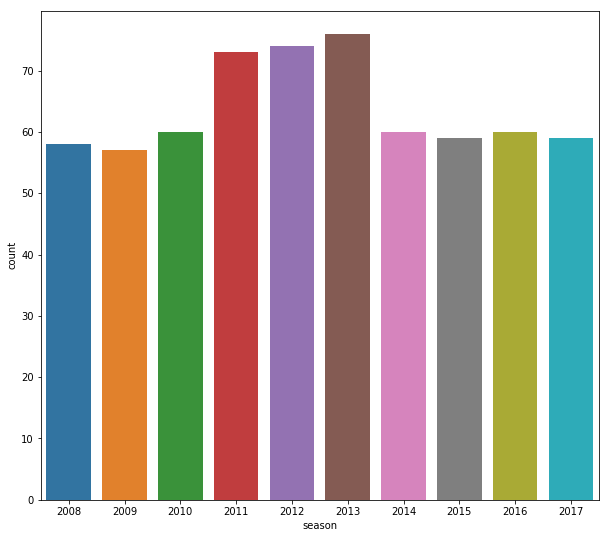

In [48]:
plt.figure(figsize=(10,9))
sns.countplot(mat['season'])

# TOSS WINNER TRENDS

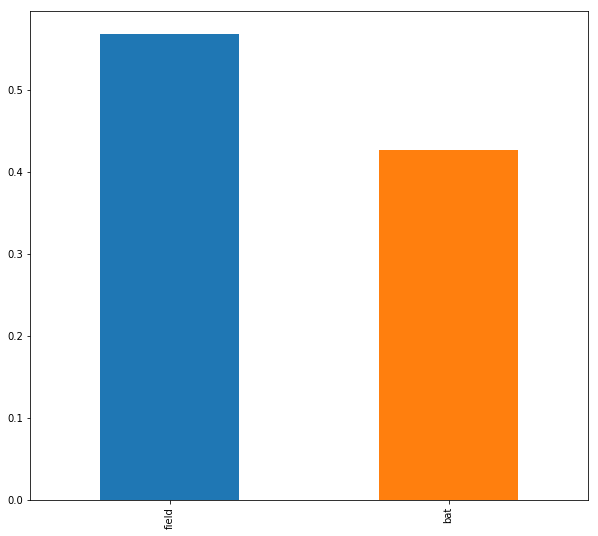

In [49]:
toss=mat['toss_decision'].value_counts()
toss=toss/638
plt.figure(figsize=(10,9))
toss.plot(kind='bar')

In [50]:
win=0

for i in mat['toss_winner'].index:
    if mat['toss_winner'][i]==mat['winner'][i]:
        win +=1
print(win/638)

0.5094043887147336


# THUS EVEN THOUGH  A TEAM WINS TOSS
# IT HAS 51% OF WINNING

In [51]:
print(mat['winner'].value_counts())

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64


# NUMBER OF MATCHES WON BY EACH TEAM

AxesSubplot(0.125,0.125;0.775x0.755)


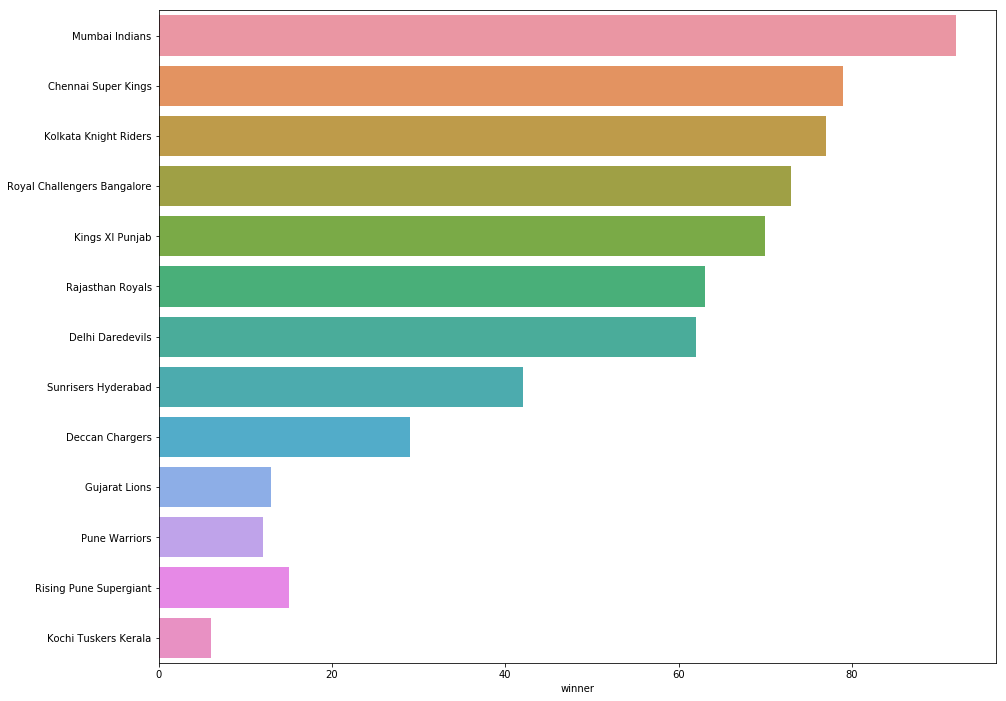

In [52]:
plt.figure(figsize=[15,12])
win=mat['winner'].value_counts()
win['Rising Pune Supergiant']=win['Rising Pune Supergiant']+win['Rising Pune Supergiants']
win.drop(labels='Rising Pune Supergiants',axis=0,inplace=True)
print(sns.barplot(y=win.index,x=win))

([<matplotlib.patches.Wedge at 0x1e239ea5b38>,
 [Text(1.0770691524644362, 0.5290765925738362, 'Mumbai Indians'),
  Text(0.28865393430984715, 1.0614513206960774, 'Chennai Super Kings'),
  Text(-0.5357558373584521, 0.9607110297776038, 'Kolkata Knight Riders'),
  Text(-1.0449749469822585, 0.34355110271897876, 'Royal Challengers Bangalore'),
  Text(-1.016528426575641, -0.4203212556648214, 'Kings XI Punjab'),
  Text(-0.5452652878035253, -0.9553458881036433, 'Rajasthan Royals'),
  Text(0.11172321407544167, -1.0943116208085581, 'Delhi Daredevils'),
  Text(0.6372538413758061, -0.8966089123200701, 'Sunrisers Hyderabad'),
  Text(0.9075426330167256, -0.6215837588427396, 'Deccan Chargers'),
  Text(1.016528468388534, -0.42032115454216834, 'Gujarat Lions'),
  Text(1.0607317735831059, -0.2912869796459132, 'Pune Warriors'),
  Text(1.0901387474057966, -0.1469609179493679, 'Rising Pune Supergiant'),
  Text(1.0995123333391497, -0.03275101273394639, 'Kochi Tuskers Kerala')],
 [Text(0.6282903389375877, 0.3

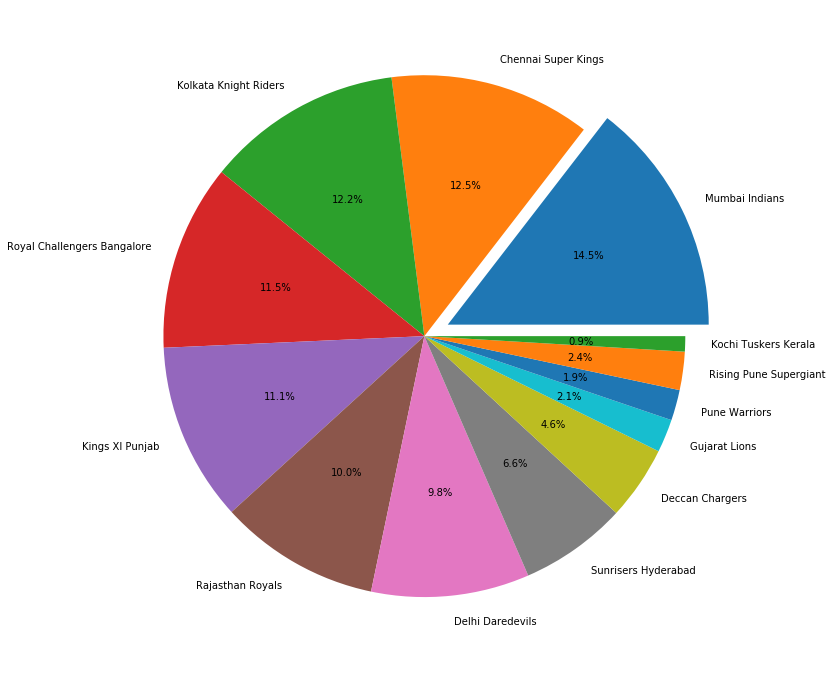

In [53]:
plt.figure(figsize=(15,12))
plt.pie(win,labels=win.index,explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%')

# WIN PERCENTAGE

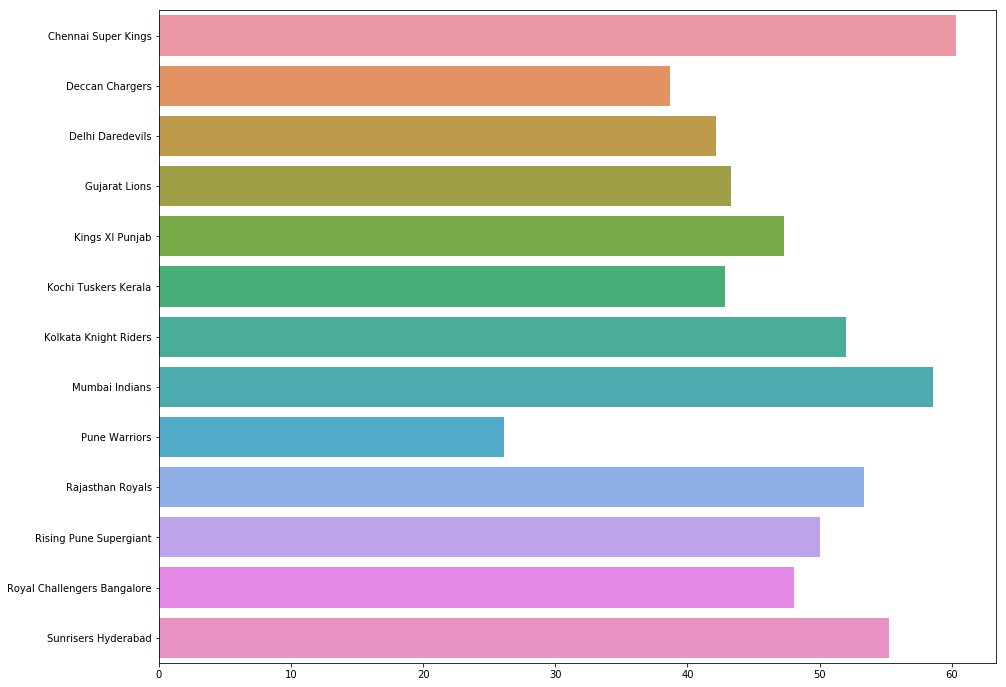

In [54]:
win=mat['winner'].value_counts()
team1=mat['team1'].value_counts()
team2=mat['team2'].value_counts()

win['Rising Pune Supergiant']=win['Rising Pune Supergiant']+win['Rising Pune Supergiants']
win.drop(labels='Rising Pune Supergiants',axis=0,inplace=True)

total=team1+team2

total['Rising Pune Supergiant']=total['Rising Pune Supergiant']+total['Rising Pune Supergiants']
total.drop(labels='Rising Pune Supergiants',axis=0,inplace=True)

percentage=win/total*100

plt.figure(figsize=(15,12))
sns.barplot(x=percentage,y=percentage.index)

In [55]:
big_margin=mat[(mat['win_by_runs']>50) |(mat['win_by_wickets']>8)]
print(big_margin.winner.unique())

['Kolkata Knight Riders' 'Sunrisers Hyderabad' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Kings XI Punjab' 'Mumbai Indians'
 'Chennai Super Kings' 'Deccan Chargers' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Rising Pune Supergiants']


Royal Challengers Bangalore    17
Chennai Super Kings            16
Mumbai Indians                 14
Delhi Daredevils               10
Rajasthan Royals                9
Kolkata Knight Riders           7
Kings XI Punjab                 6
Deccan Chargers                 4
Sunrisers Hyderabad             3
Rising Pune Supergiant          2
Rising Pune Supergiants         1
Name: winner, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


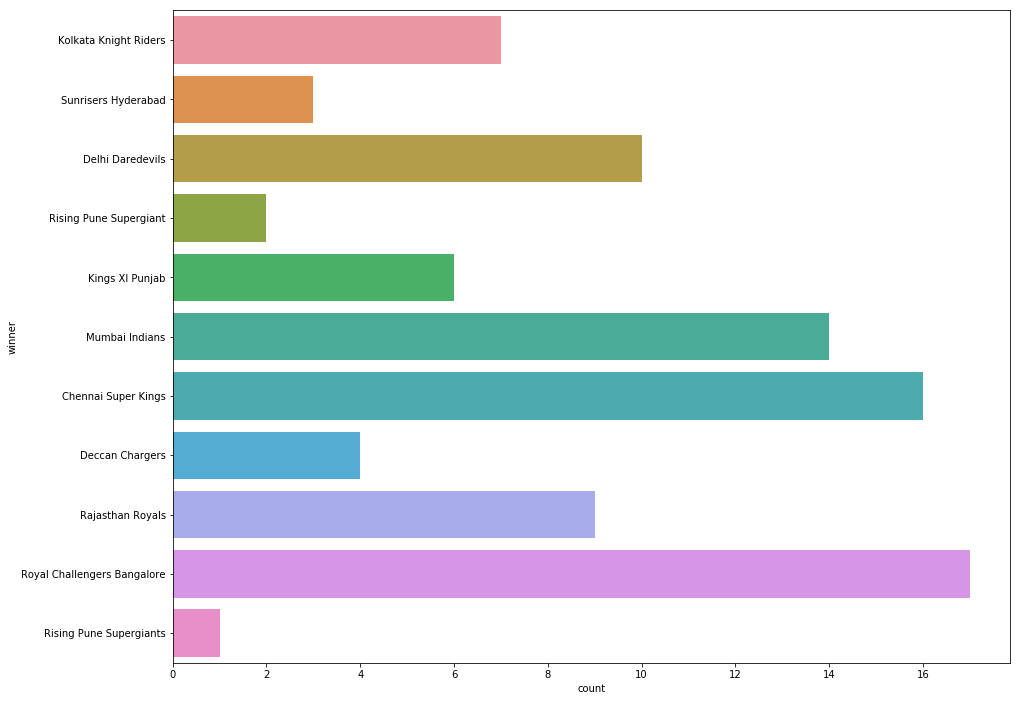

In [56]:
print(big_margin['winner'].value_counts())
plt.figure(figsize=(15,12))
print(sns.countplot(y=big_margin['winner']))

([<matplotlib.patches.Wedge object at 0x000001E23CA912E8>, <matplotlib.patches.Wedge object at 0x000001E23CA91A20>, <matplotlib.patches.Wedge object at 0x000001E23CA9D160>, <matplotlib.patches.Wedge object at 0x000001E23CA9D860>, <matplotlib.patches.Wedge object at 0x000001E23CA9DF60>, <matplotlib.patches.Wedge object at 0x000001E23C6C56A0>, <matplotlib.patches.Wedge object at 0x000001E23C6C5DA0>, <matplotlib.patches.Wedge object at 0x000001E23C6D04E0>, <matplotlib.patches.Wedge object at 0x000001E23C6D0BE0>, <matplotlib.patches.Wedge object at 0x000001E23C6D8320>, <matplotlib.patches.Wedge object at 0x000001E23CA73198>], [Text(1.031613408972675, 0.7058851000182514, 'Royal Challengers Bangalore'), Text(-0.21221867251816898, 1.0793346260704444, 'Chennai Super Kings'), Text(-1.0449557907577773, 0.34360936448500395, 'Mumbai Indians'), Text(-0.9493757203855635, -0.5555949437696427, 'Delhi Daredevils'), Text(-0.3984304536086086, -1.0253063803747826, 'Rajasthan Royals'), Text(0.2122187483091

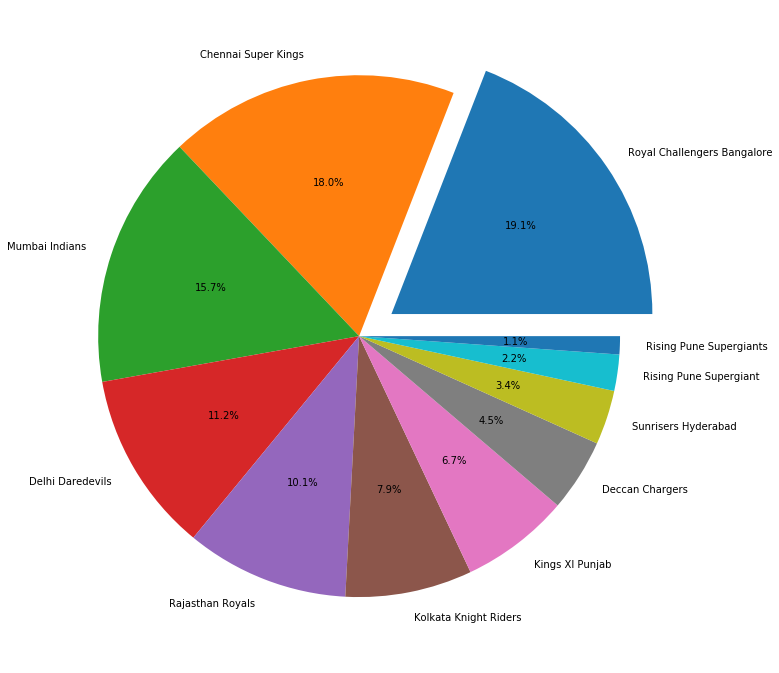

In [57]:
plt.figure(figsize=(15,12))
print(plt.pie(big_margin['winner'].value_counts(),labels=big_margin['winner'].value_counts().index,autopct='%1.1f%%',explode=[0.15,0,0,0,0,0,0,0,0,0,0]))

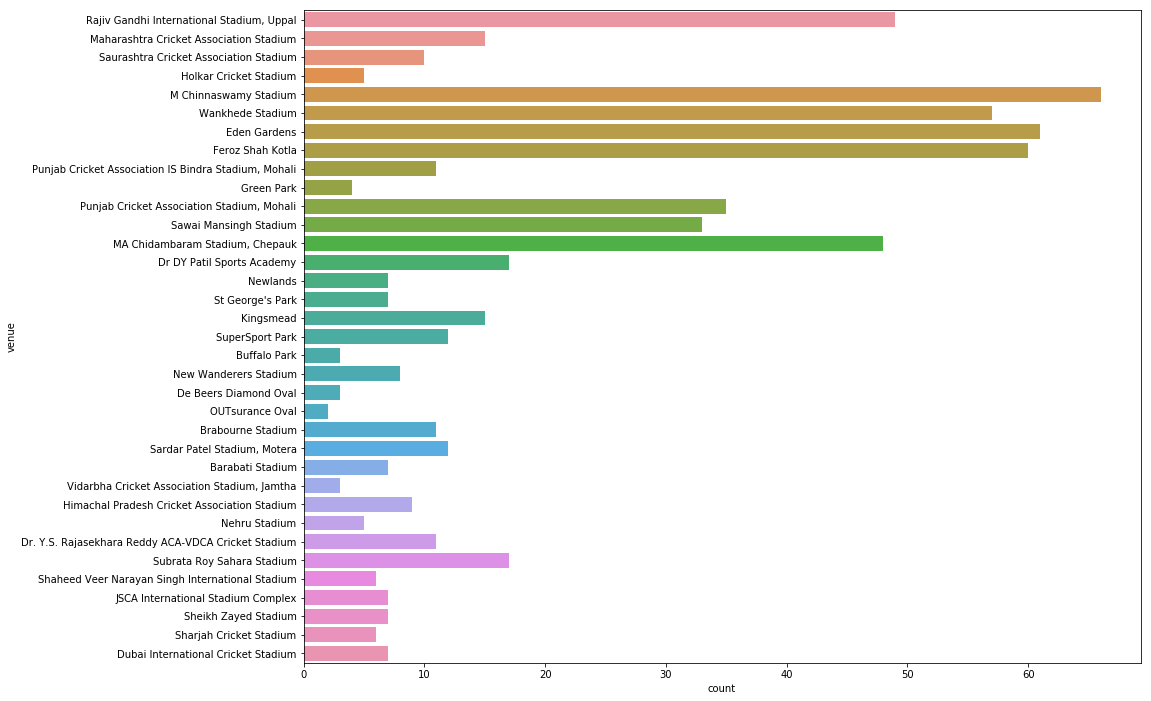

In [58]:
plt.figure(figsize=(15,12))
sns.countplot(y=mat['venue'])

AxesSubplot(0.125,0.125;0.775x0.755)


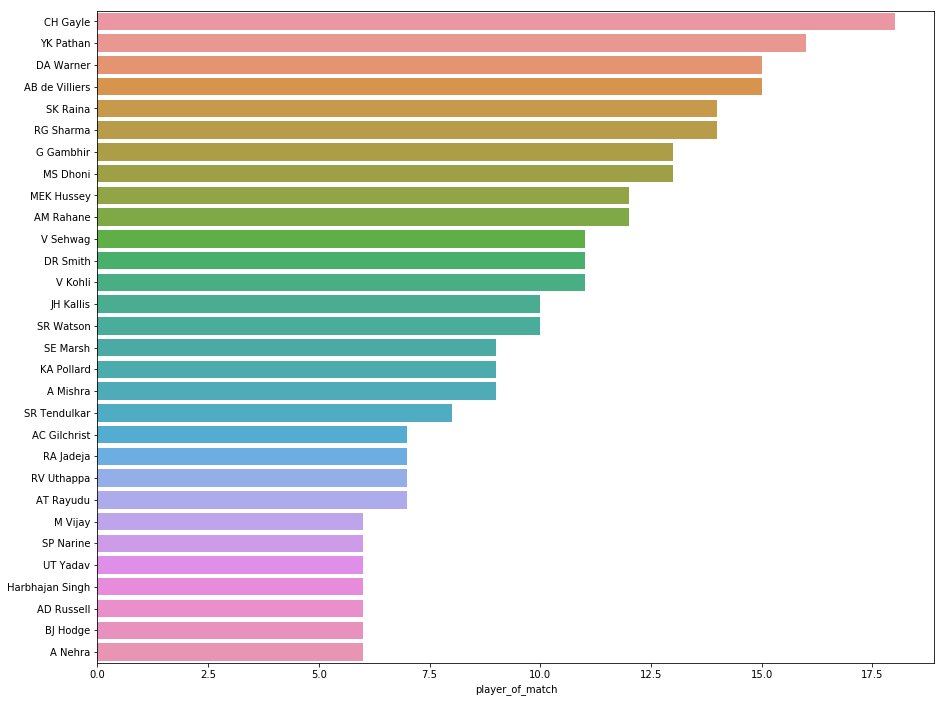

In [59]:
most_mom=mat['player_of_match'].value_counts().sort_values(ascending=False)
most_mom=most_mom[:30]
plt.figure(figsize=(15,12))
print(sns.barplot(y=most_mom.index,x=most_mom))

In [60]:
avg_run_win=mat[(mat['win_by_runs']>0)]['win_by_runs'].mean()
avg_wic_win=mat[(mat['win_by_wickets']>0)]['win_by_wickets'].mean()

In [61]:
print(avg_run_win)
print(avg_wic_win)

30.320557491289197
6.327433628318584


# Average WIN BY RUN
## 30.320557491289197

# Average WIN BY WICKET
## 6.327433628318584

# THIS COMPLETES MATCH DATA ANALYSIS

# NOW BALL BY BALL ANALYSIS

In [62]:
dil=pd.read_csv('deliveries.csv')

In [63]:
dil.shape

(150460, 21)

In [64]:
dil.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [65]:
dil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [66]:
dil.drop('match_id',axis=1,inplace=True)
dil.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


## NUMBER OF BALLS BOWLED
# 150460

## THEREFORE NUMBER OF BALLS PER MATCH
# 235.83

# MOST BALLS FACED

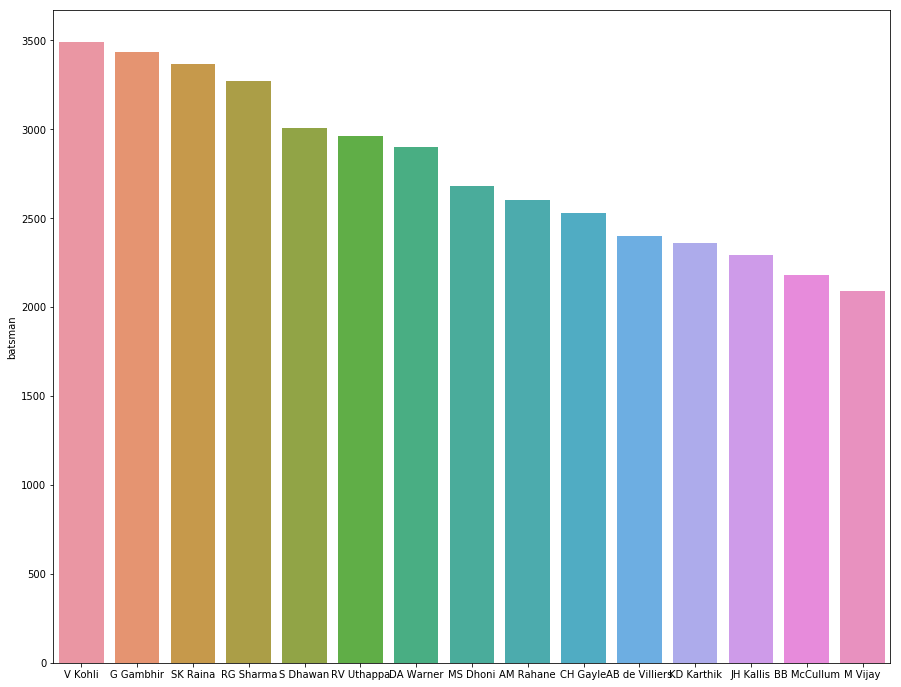

In [67]:
balls_faced=dil['batsman'].value_counts()
balls_faced=balls_faced[:15]

plt.figure(figsize=(15,12))
sns.barplot(y=balls_faced,x=balls_faced.index)

# MOST BALLS BOWLED

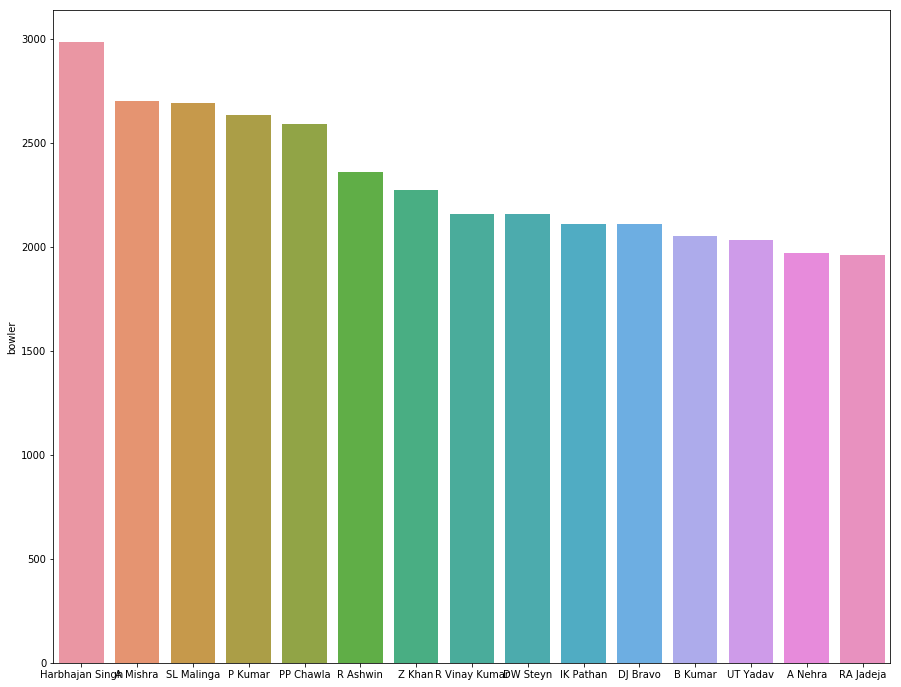

In [68]:
balls_bowled=dil['bowler'].value_counts()
balls_bowled=balls_bowled[:15]

plt.figure(figsize=(15,12))
sns.barplot(y=balls_bowled,x=balls_bowled.index)

In [69]:
dil['player_dismissed'].count()

7438

## THERFORE AVERAGE BALLS PER WICKET
# 20.22

# TOP RUN GETTERS 

In [70]:
dil['balls']=1

bat=dil.groupby('batsman').sum()

print(bat['batsman_runs'].sort_values(ascending=False)[:30])

batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
AM Rahane         3057
YK Pathan         2922
KD Karthik        2903
BB McCullum       2755
V Sehwag          2728
SR Watson         2628
Yuvraj Singh      2591
M Vijay           2511
SE Marsh          2489
JH Kallis         2427
AT Rayudu         2416
DR Smith          2385
KA Pollard        2354
SR Tendulkar      2334
PA Patel          2322
MK Pandey         2223
R Dravid          2174
AC Gilchrist      2069
JP Duminy         1993
MEK Hussey        1977
Name: batsman_runs, dtype: int64


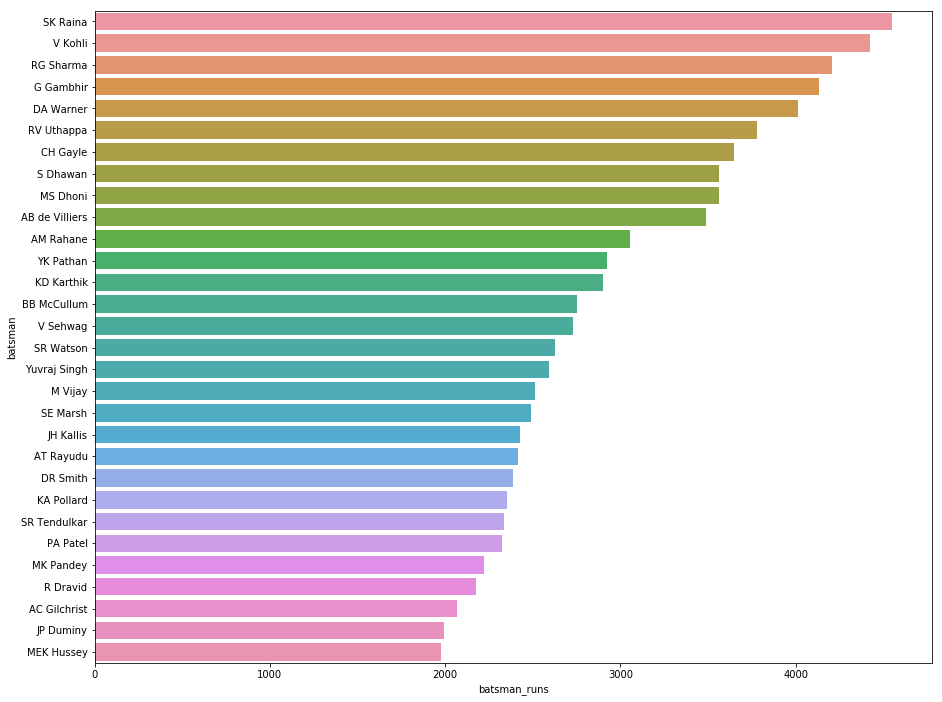

In [71]:
plt.figure(figsize=(15,12))
sns.barplot(y=bat['batsman_runs'].sort_values(ascending=False)[:30].index,x=bat['batsman_runs'].sort_values(ascending=False)[:30])

# BEST STRIKE RATE

In [72]:
stra=bat[bat['batsman_runs']>500]['batsman_runs']/bat['balls']
stra=stra.sort_values(ascending=False)*100
stra=stra[:30]
print(stra)

batsman
AD Russell         164.000000
GJ Maxwell         157.564103
V Sehwag           148.827059
RR Pant            148.031496
AB de Villiers     145.129059
CH Gayle           144.194313
JC Buttler         140.800000
YK Pathan          140.751445
KA Pollard         140.621266
DA Warner          138.318401
HM Amla            138.038278
DA Miller          137.709251
JA Morkel          136.938202
Harbhajan Singh    135.194585
SK Raina           134.995548
SR Watson          134.838379
ST Jayasuriya      134.031414
AC Gilchrist       133.054662
MS Dhoni           132.835821
DR Smith           132.279534
KP Pietersen       132.058047
ML Hayden          131.942789
KM Jadhav          130.555556
SE Marsh           130.109775
JP Faulkner        129.802956
JD Ryder           129.613734
SPD Smith          128.507127
RG Sharma          128.497251
Q de Kock          128.268551
WP Saha            127.727646
dtype: float64


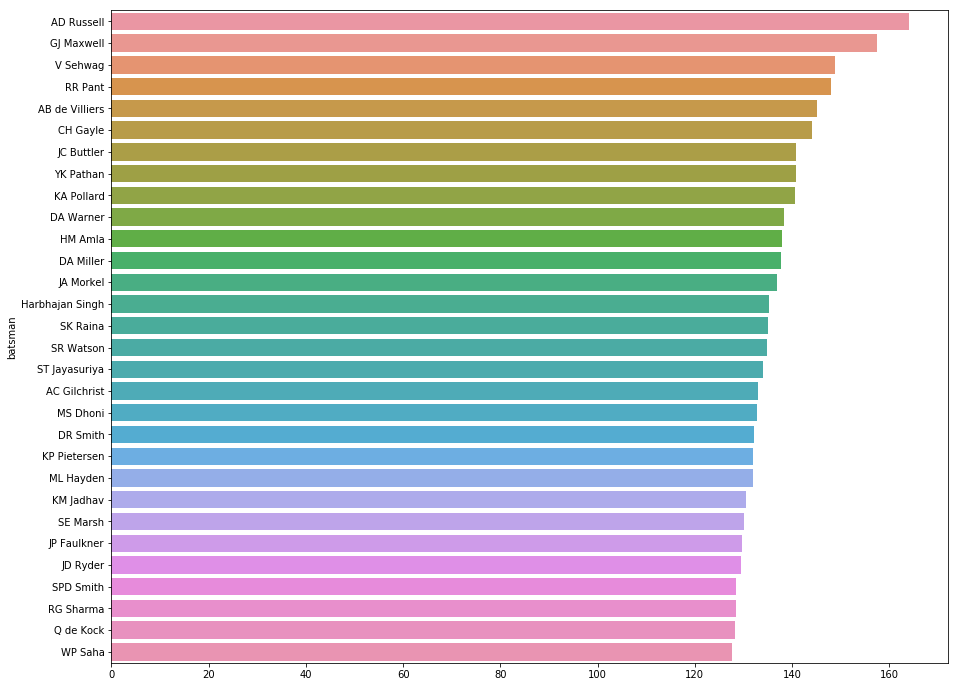

In [73]:
plt.figure(figsize=(15,12))
sns.barplot(y=stra.index,x=stra)

# MOST BALLS BOWLED

In [74]:
ball=dil.groupby('bowler').sum()

bowler=ball['balls']
bowler=bowler.sort_values(ascending=False)
bowler=bowler[:30]
print(bowler)

bowler
Harbhajan Singh    2989
A Mishra           2703
SL Malinga         2694
P Kumar            2637
PP Chawla          2594
R Ashwin           2359
Z Khan             2276
R Vinay Kumar      2161
DW Steyn           2159
IK Pathan          2113
DJ Bravo           2110
B Kumar            2054
UT Yadav           2033
A Nehra            1974
RA Jadeja          1962
SR Watson          1961
SP Narine          1956
PP Ojha            1945
RP Singh           1874
JA Morkel          1807
JH Kallis          1799
I Sharma           1713
M Morkel           1699
R Bhatia           1661
AB Dinda           1589
M Muralitharan     1581
L Balaji           1574
MM Sharma          1566
SK Trivedi         1557
DS Kulkarni        1485
Name: balls, dtype: int64


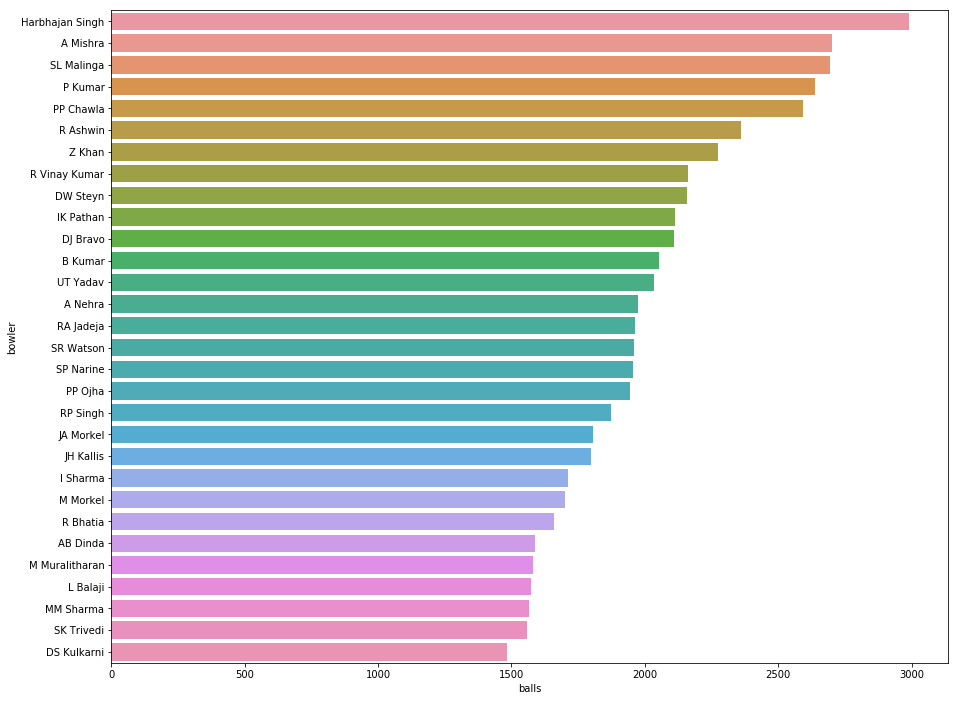

In [75]:
plt.figure(figsize=(15,12))
sns.barplot(y=bowler.index,x=bowler)

# BEST ECONOMY 

In [76]:
ball['economy']=ball['total_runs']/ball['balls']*6
eco=ball[ball['balls']>500]['economy'].sort_values(ascending=True)[:30]
print(eco)

bowler
SP Narine          6.395706
R Ashwin           6.490886
DW Steyn           6.600278
A Kumble           6.646999
M Muralitharan     6.698292
SL Malinga         6.757238
DL Vettori         6.833121
J Botha            6.922426
Harbhajan Singh    6.931415
S Nadeem           7.029024
B Kumar            7.039922
R Sharma           7.058824
DP Nannes          7.097242
MA Starc           7.107843
Shakib Al Hasan    7.115100
JP Duminy          7.124451
Iqbal Abdulla      7.158006
DE Bollinger       7.160000
SK Warne           7.187244
M Kartik           7.197970
WD Parnell         7.297837
YK Pathan          7.312178
A Mishra           7.336293
SK Raina           7.357143
Yuvraj Singh       7.373993
B Lee              7.375546
PP Ojha            7.400514
AR Patel           7.425000
STR Binny          7.429603
R Bhatia           7.437688
Name: economy, dtype: float64


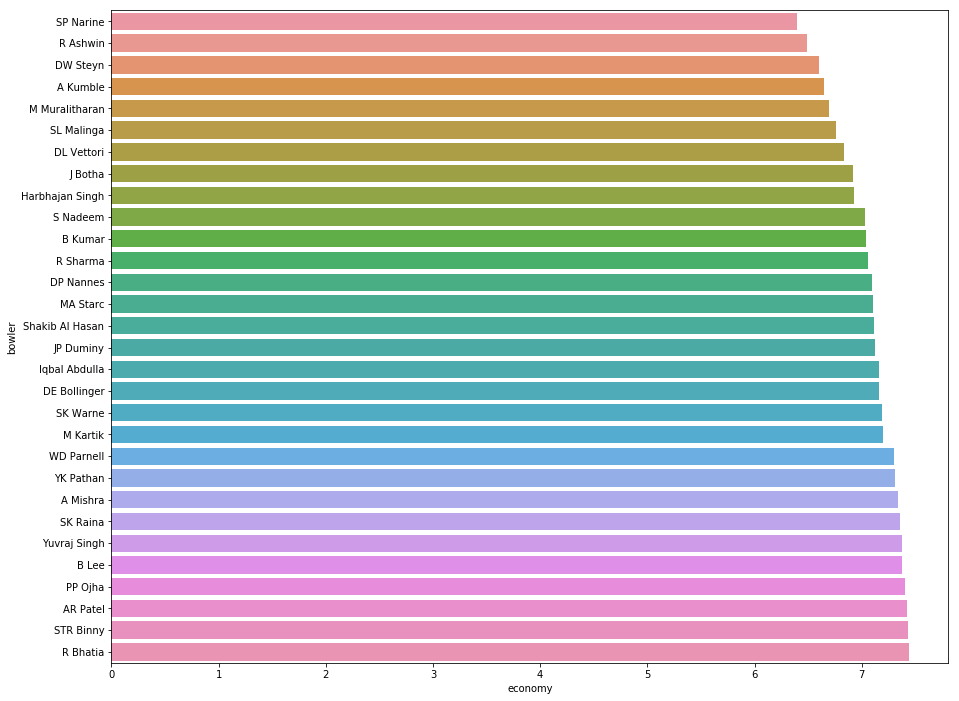

In [77]:
plt.figure(figsize=(15,12))
sns.barplot(y=eco.index,x=eco)

# DISSMISAL KINDS

In [86]:
columns=['player_dismissed','bowler','dismissal_kind']
ball=dil[columns]
dk=ball['dismissal_kind'].value_counts()
dk

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: dismissal_kind, dtype: int64

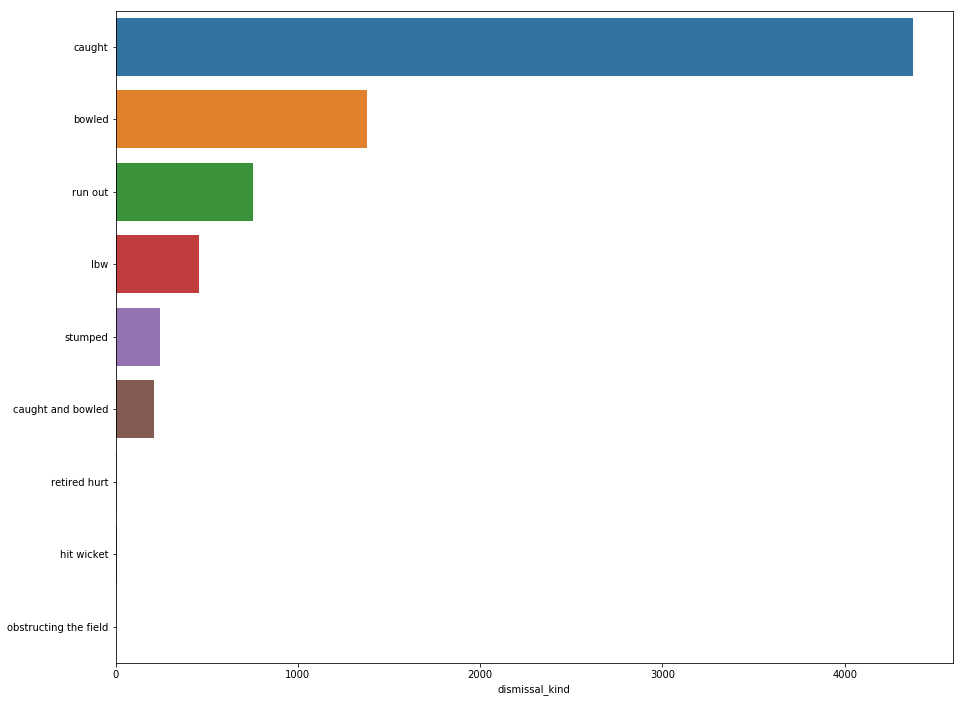

In [87]:
plt.figure(figsize=(15,12))
sns.barplot(y=dk.index,x=dk)

# MOST WICKETS

In [88]:
ball.dropna(inplace=True)
for i in ball.index:
    if ball['dismissal_kind'][i]=='run out' or ball['dismissal_kind'][i]=='retired hurt' or ball['dismissal_kind'][i]=='obstructing the field':
        ball.drop(i,axis=0,inplace=True)

      

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
ball['dismissal_kind']=1
ball=ball.groupby('bowler').sum()
ball

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,dismissal_kind
bowler,
A Ashish Reddy,18
A Chandila,11
A Choudhary,5
A Flintoff,2
A Kumble,45
A Mishra,134
A Mithun,7
A Nehra,106
A Nel,1


In [93]:
ball=ball['dismissal_kind'].sort_values(ascending=False)


KeyError: 'dismissal_kind'

In [94]:
ball=ball[:30]

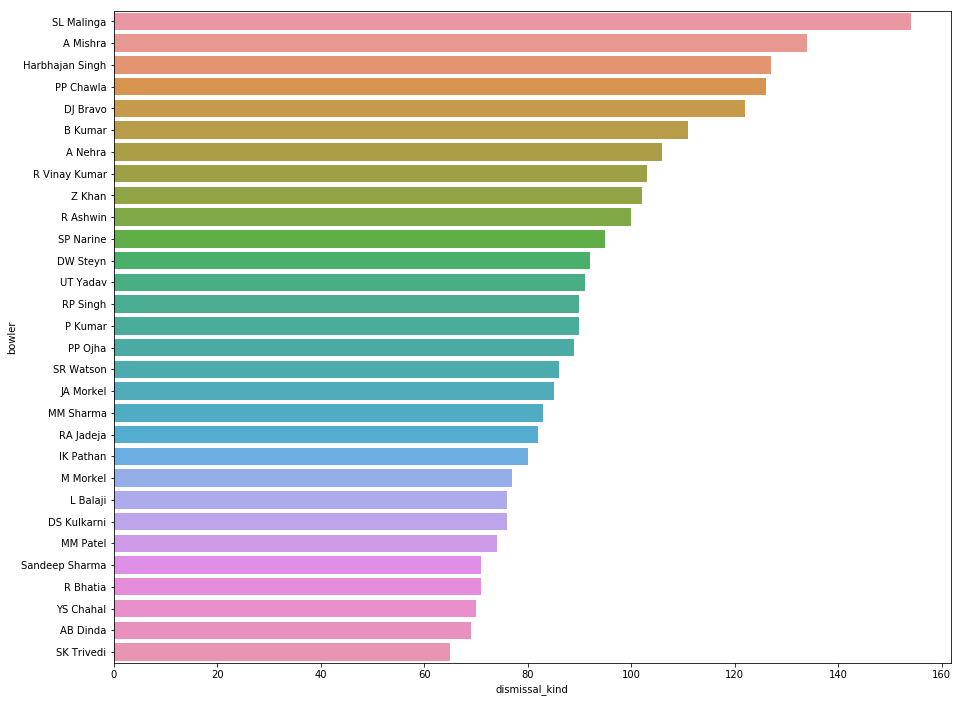

In [96]:
plt.figure(figsize=(15,12))
sns.barplot(y=ball.index,x=ball)

# THIS COMPLETES OUR ANALYSIS